# Лабараторная работа №7. Работа с текстовыми данными.
# Максутова Азима. AIN-1-22
## Введение
Latent Dirichlet Allocation (LDA) — это вероятностный алгоритм тематического моделирования, который используется для анализа текстовых данных и автоматической классификации документов по темам. Он позволяет определить скрытые темы в коллекции текстов, а также соотнести каждый документ с этими темами.

В ходе работы был изучен материал лекции №12 и проделаны задания.

---

## Основные шаги работы

1. **Подготовка данных**:
   - Импорт данных и предварительная обработка текстов.
   - Очистка данных (удаление HTML-тегов, спецсимволов и т.д.).
   
2. **Создание Bag-of-Words модели**:
   - Использование `CountVectorizer` для векторизации текстов.
   - Выбор ключевых параметров: максимальное количество слов (`max_features`), фильтрация частотных и редких слов (`max_df`, `min_df`).

3. **Применение LDA**:
   - Настройка модели `LatentDirichletAllocation`.
   - Определение количества тем и параметров обучения.
   - Тренировка модели на подготовленных данных.

4. **Анализ результатов**:
   - Определение ключевых слов для каждой темы.
   - Соотнесение документов с темами.
   - Визуализация распределения тем.



In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [12]:
from sklearn.datasets import load_files
reviews_train = load_files("aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target


In [13]:
text_train = [doc.replace(b"<br/>", b"") for doc in text_train]
# Задача этого этапа — убрать HTML-теги <br/>, чтобы текст был "чистым" и не содержал разметки, которая не влияет на анализ текста.

In [14]:
reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br/>", b"") for doc in text_test]

In [15]:
# Создание векторизатора
vect = CountVectorizer(max_features=10000, max_df=0.15)
X_doc = vect.fit_transform(text_train)

In [16]:

# Настройка модели LDA
lda = LatentDirichletAllocation(
    n_components=10, learning_method="batch", max_iter=10, random_state=0
)
# Применение модели к данным
document_topics = lda.fit_transform(X_doc)

In [17]:
lda.components_.shape

(10, 10000)

In [18]:
import numpy as np
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

In [19]:
import mglearn
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
action        saw           horror        horror        musical       
fight         book          house         pretty        comedy        
john          didn          dead          funny         song          
war           years         blood         comedy        music         
hero          now           killer        lot           funny         
western       kids          girl          fun           allen         
battle        10            around        quite         dance         
down          old           night         though        songs         
star          thought       gets          bit           tom           
lee           again         woman         isn           version       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
fami

In [20]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=0)
document_topics100 = lda100.fit_transform(X_doc)

In [21]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
cagney        crime         anderson      joe           moore         van           horror        
role          cop           new           rock          godzilla      dennis        scary         
flynn         noir          prince        band          oil           ninja         creepy        
plays         police        russell       bugs          michael       quaid         slasher       
young         city          york          short         doc           damme         gore          
douglas       detective     cinderella    shorts        america       fight         ghost         
performance   criminal      kurt          music         john          wilson        house         
cast          boss          hudson        larry         bush          action        dark          
played    

In [22]:
music = np.argsort(document_topics100[:, 45])[::-1]
for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) +b".\n")

b"It's not the best Columbo movie out of the series but it's just as good and perfectly watchable as most other Columbo series from the long running series of fine movies.<br /><br />The movie features some very long sequences, of which some are really too long.\n"
b'The Columbo formula was thrown out the window here. Unfortunately, so was the pacing.\n'
b"This is the Columbo that got directed by Steven Spielberg at an early point in his career. It's nothing sensational but some small hint of great things to come for Spielberg can be seen in this movie.\n"
b"This departure from the basic Columbo script works out well, for once. For reasons not revealed here, Columbo's singular murder suspect has to be dropped from consideration.\n"
b'This was the first regular filmed Columbo movie episode but yet it aired as the second, after Steven Spielberg\'s "Columbo: Murder by the Book". It\'s also at the same time among one of the better ones!<br /><br />Bernard L.\n'
b"It's nice that the movie t

In [23]:
document_topics100.shape

(75000, 100)

(75000, 100)


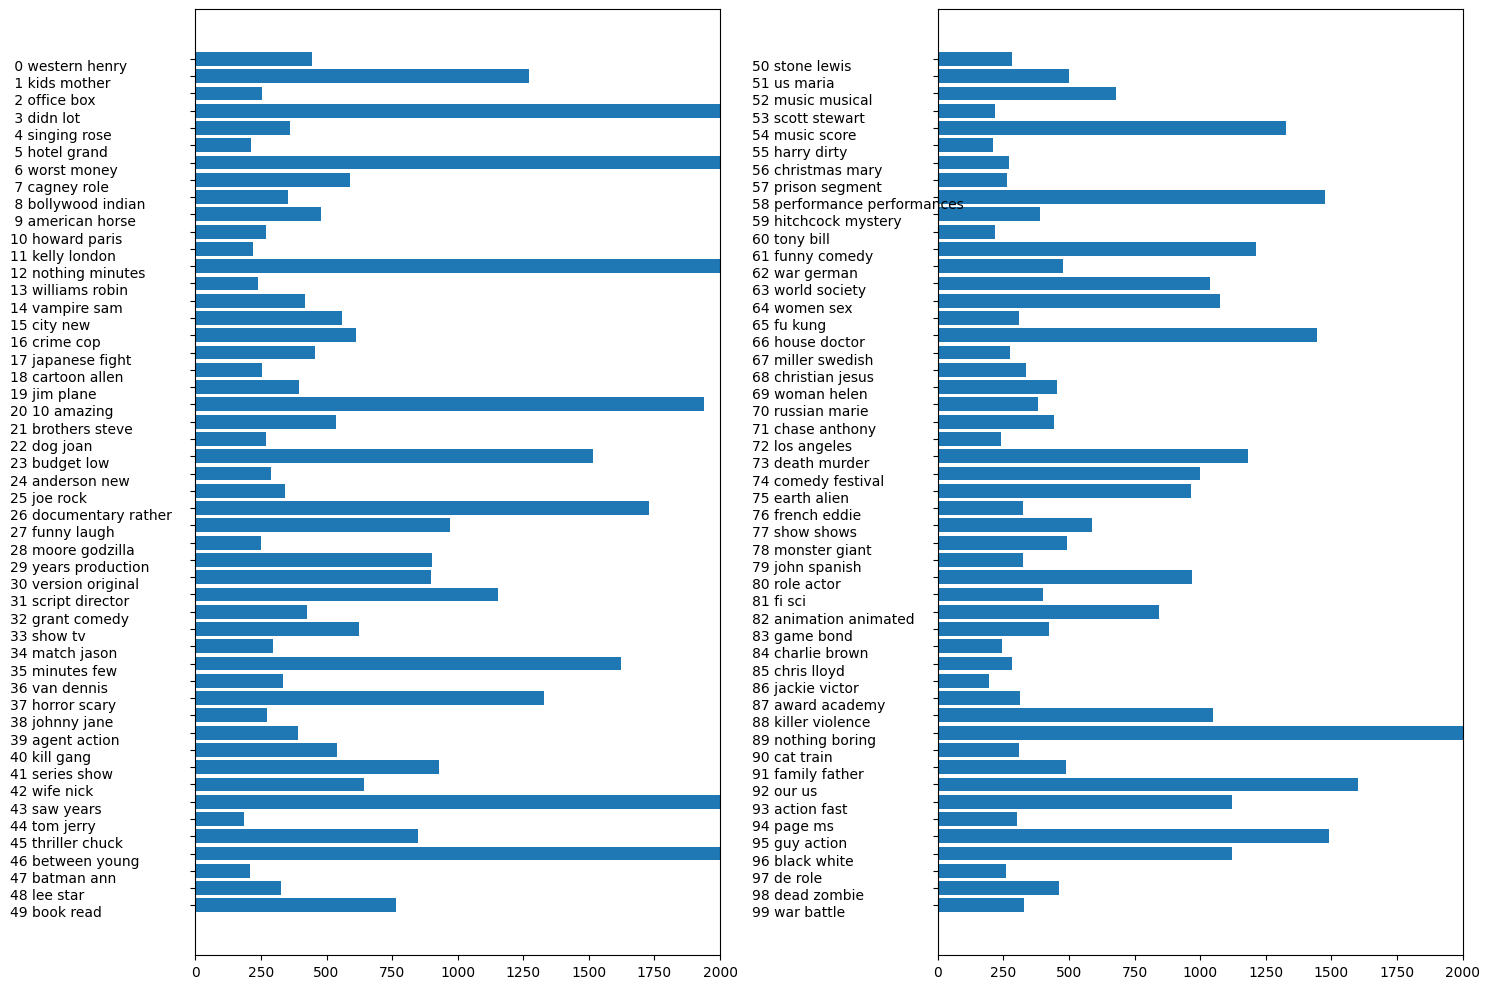

In [24]:
import matplotlib.pyplot as plt
import numpy as np
print(document_topics100.shape) 

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

topic_names = [
    "{:>2}".format(i) + " " + " ".join(words)
    for i, words in enumerate(feature_names[sorting[:, :2]])
]

for col in [0, 1]:
    start = col * 50
    # Ограничение до 100
    end = min((col + 1) * 50, document_topics100.shape[1])

    topics_sum = np.sum(document_topics100, axis=0)[start:end]
    y_indices = np.arange(len(topics_sum)) 

    ax[col].barh(y_indices, topics_sum)
    ax[col].set_yticks(y_indices)
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)

plt.tight_layout()
plt.show()

# Описание выполнения заданий:

## 1. Создание «мешка слов» из отзывов
В данном шаге был создан набор из 20-25 отзывов, которые являются примерами текстовых данных о различных заведениях, таких как бары и рестораны. Каждое описание отзыва включает оценку заведения (положительную или отрицательную) и ответ на этот отзыв. Эти данные позволяют анализировать текстовые отзывы и классифицировать их по тональности.

**Краткое пояснение к данным**:
- **Отзывы** — текст, который содержит описание опыта клиента в заведении (например, о качестве еды, атмосфере, обслуживании и т.д.).
- **Классы** — бинарная метка, где 1 означает положительный отзыв, а 0 — отрицательный.
- **Ответ** — это текст, который представляет собой ответ заведения на отзыв клиента.

## 2. Создание словаря стоп-слов и применение к «мешку слов»
Я использовала стандартный словарь стоп-слов из библиотеки sklearn, который предоставляет набор часто встречающихся слов на английском языке (например, "the", "and", "to"), которые не несут значимой информации для анализа текста
## 3. Масштабирование данных с помощью TF-IDF
## 4. Использование n-грамм (1, 2, 3) и Pipeline
## 5. Исследование коэффициентов модели


In [25]:
import pandas as pd
data_of_reviews = [
    ("Fantastic spot for an even or a quiet cocktail. They were swell to host the Yelp crew with a great drink menu and super attentive staff. I'd certainly recommend anything with the purred fruit in it (apple, any of them really)!",
     1, "Thank you for your positive feedback! We're glad you enjoyed your experience and appreciate your recommendation."),
    ("Love, love, love the calamari. It's so good and spicy. There is an endless list of martinis and one is better than the next. There is a first and second floor, if you prefer more of a bar or lounge atmosphere. It's not a place I like for dinner, but for drinks and apps it's wonderful.",
     1, "We're thrilled to hear you love our calamari! Thank you for your kind words about our drinks and atmosphere."),
    ("Love this place. Stiff martinis and cocktails, cheap drinks, good service, nice atmosphere to chill in the upstairs lounge and hang up with your friends. Classy crowd and much more mature, older, and professional crowd. There aren't any of those college frat boys or belligerent drunks there, which is so great. Very nice place to wind down after a long day.",
     1, "Thank you for your wonderful review! We're delighted you enjoyed our atmosphere and had a great time with your friends."),
    ("It's everything a great cocktail bar should be. Great location, ambiance, cocktails and chill environment. **Disclaimer: 5 stars doesn't have to mean it's New York City good. It is a simple place and it's not flashy by any means. I'd take a girl for the beginning of a date or on the opposite end of the spectrum, talking business with colleagues.",
     1, "Thank you for your detailed review! We're glad you find our bar meets your expectations for both casual and professional gatherings."),
    ("I came here before a pirates game, so it was around 5:30ish or so in the evening, we had just gotten lucky that they had a table open before all their reservations for the night started to come in. I ordered the chicken jerk sandwich with a side salad, absolutely loved it! The chicken had the perfect amount of spice to it which was offset with sweet with the pineapple chutney it had on it, sooo good! The salad was even great because they used real green spring mix instead of iceberg lettuce. I also loved that they put feta cheese on top, its one of my favorite cheeses for salad topping! Service was great here and even though I didn't have a drink here that night I have a previous time and they are yummy! Love this place and can't wait for my next visit!",
     1, "Thank you for your wonderful review! We're thrilled to hear you enjoyed the chicken jerk sandwich and our service. We look forward to welcoming you back soon!"),
    ("Olive or Twist is the historic site of my VERY FIRST MARTINI when I turned 21, many years ago. It's been a long, happy union. While Olive or Twist is NOT a five star restaurant, it gets 5 stars from me because I love it. It's one of the few places I know of that has been CONSISTENTLY good for years! The interior is warm and a little bit industrial. The downstairs is the same as it has always been and it's still very nice. The drinks are great although the first martini I ever had (a girl doesn't forget! [well, this one didn't]) was a Pineapple Upside Down martini and I don't think they offer that anymore but they do have a very expansive martini menu. I tried the chipotle martini and it was so excellent that when I took my first sip I sighed in a way my bf turned to me and sarcastically said, 'Oh, you're going to be Yelping about that, aren't you.' Then, I refused to let him even try it bc it was that good. It was MINE. I also had a cake batter martini which tasted great and came out looking so pretty I instagrammed a picture of it and immediately all my friends clicked like on it, and my one aunt commented I should drink less. Whatever. She needs a martini. The service was great. Our waitress, Lauren, was really cool and very good at recommending the drinks—the chipotle martini was her recommendation, I would never have ordered that on my own. We had the buffalo chicken dip which was served in a martini glass and it was really good. My favorite thing on the menu there is the tomato basil bisque soup and it has been rocking my lunch hour for the past ten years. It's delicious. It's so good that Lauren and I actually high fived when she brought it out. (true story.) My bf had the chicken caprese wrap and said it was excellent, it was gone within minutes so that is a good sign. I highly recommend this place for lunch, after dinner cocktails, or a date. This is one of my favorite downtown lunch spots!", 1, "Thank you for sharing your delightful memories with us! We're glad you enjoyed your first martini and the recommendations. We hope to serve you again soon!"),
    ("A beautiful little bar with an exciting 'martini' list - do step outside your comfort zone and try one of the crafted drinks.",
     1, "Thank you for your kind words! We're glad you enjoyed our martini selection and encourage everyone to explore new flavors!"),
    ("My favorite bar in town love the live music and the martinis - fave is the strawberry shortcake!", 1,
     "Thank you for your loyalty! We're thrilled you love the live music and our strawberry shortcake martini. See you again soon!"),
    ("The location is in a strip mall, but this place is a diamond in the rough. The food was some of the best Italian food I have had anywhere. I live in Kansas City, which has a pretty large and longstanding Italian population. The food is as good as any of the old Italian places in KC. Everyone in my group was amazed at the quality of the food for the price. I will keep this one on my list of places to come back to when I am in AZ again.",
     1, "We're so happy to hear you enjoyed your experience with us! Thank you for the high praise on our Italian cuisine. We can't wait to welcome you back!"),
    ("The ambiance was lovely, and the food was delicious. I can't wait to come back!",
     1, "Thank you for your wonderful feedback! We're excited to have you back soon."),
    ("I had a terrible experience. The service was slow, and my order was wrong.",
     0, "We're sorry to hear that! Please contact us so we can make it right."),
    ("The desserts were to die for! Especially the chocolate cake!", 1,
     "We appreciate your sweet words! We're glad you enjoyed our desserts."),
    ("I found the place too noisy for my liking. Couldn't enjoy my meal.", 0,
     "Thank you for your feedback. We will consider ways to improve the atmosphere."),
    ("Excellent service from the staff, they were very friendly and accommodating.",
     1, "Thank you for your kind words! We're glad you enjoyed the service."),
    ("Too overpriced for what you get. I was disappointed.", 0,
     "We're sorry to hear you felt that way. Your feedback helps us improve."),
    ("Fantastic brunch spot! The pancakes were amazing and so fluffy!", 1,
     "Thank you for your lovely feedback! We're happy to hear you enjoyed brunch."),
    ("The coffee was cold and tasted burnt. I won't be returning.", 0,
     "We're sorry to hear about your experience. We appreciate your feedback."),
    ("I loved the variety of options on the menu. Something for everyone!", 1,
     "Thank you for your positive feedback! We're glad you liked our menu."),
    ("The staff seemed overwhelmed and forgot our order.", 0,
     "We're sorry for the inconvenience. We will address this with our team."),
    ("The views from the restaurant are stunning, especially at sunset!",
     1, "Thank you for your kind words! We're happy you enjoyed the views.")
]

# Создаем DataFrame
df_reviews = pd.DataFrame(data_of_reviews, columns=["review", "class", "response"])
df_reviews.to_csv("generated_reviews.csv", index=False)

In [26]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
stop_words = list(ENGLISH_STOP_WORDS)
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(df_reviews['review'])
print("Shape of the vectorized data:", X.shape)

Shape of the vectorized data: (20, 290)


In [27]:
# Вывод результатов
for i, (original, filtered) in enumerate(zip(data_of_reviews, df_reviews)):
    print(f"Оригинал {i+1}: {original}")
    print(f"После удаления стоп-слов {i+1}: {filtered}\n")

Оригинал 1: ("Fantastic spot for an even or a quiet cocktail. They were swell to host the Yelp crew with a great drink menu and super attentive staff. I'd certainly recommend anything with the purred fruit in it (apple, any of them really)!", 1, "Thank you for your positive feedback! We're glad you enjoyed your experience and appreciate your recommendation.")
После удаления стоп-слов 1: review

Оригинал 2: ("Love, love, love the calamari. It's so good and spicy. There is an endless list of martinis and one is better than the next. There is a first and second floor, if you prefer more of a bar or lounge atmosphere. It's not a place I like for dinner, but for drinks and apps it's wonderful.", 1, "We're thrilled to hear you love our calamari! Thank you for your kind words about our drinks and atmosphere.")
После удаления стоп-слов 2: class

Оригинал 3: ("Love this place. Stiff martinis and cocktails, cheap drinks, good service, nice atmosphere to chill in the upstairs lounge and hang up w

# Масштабирование данных с использованием TF-IDF

**TF-IDF** (Term Frequency-Inverse Document Frequency) — это метод, который оценивает важность слов в документах на основе двух принципов:

1. **TF (частота термина)** — измеряет, как часто слово встречается в документе.
2. **IDF (обратная частота документа)** — снижает вес часто встречающихся слов, которые не помогают различать документы.

## Формула вычисления TF-IDF

TF-IDF для термина \( t \) в документе \( d \) вычисляется по следующей формуле:

$$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
$$

### Где:
- **TF(t, d)** — частота термина \( t \) в документе \( d \):

  $$
  \text{TF}(t, d) = \frac{\text{Количество вхождений термина } t \text{ в документе } d}{\text{Общее количество терминов в документе } d}
  $$

- **IDF(t)** — обратная частота термина \( t \) по всем документам:

  $$
  \text{IDF}(t) = \log \left( \frac{\text{Общее количество документов}}{\text{Количество документов, содержащих термин } t} \right)
  $$


TF-IDF помогает выделить важные термины в документах, уменьшая вес слов, которые часто встречаются во всех документах (например, стоп-слова), и повышая значимость терминов, которые уникальны для отдельных документов.


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Инициализация TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Применение TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df_reviews)

# Получение словаря и значений TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Вывод данных
print("TF-IDF матрица:")
print(tfidf_matrix.toarray())

print("\nСписок терминов:")
print(feature_names)

TF-IDF матрица:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]

Список терминов:
['class' 'response' 'review']


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X = df_reviews['review']  # Features (review text)
y = df_reviews['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

pipeline = make_pipeline(
    # Используем униграммы, биграммы и триграммы
    CountVectorizer(ngram_range=(1, 3)),
    LogisticRegression(max_iter=1000)  # Логистическая регрессия
)

# Обучение модели
pipeline.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = pipeline.predict(X_test)

# Оценка модели
print("Оценка модели (classification report):")
print(classification_report(y_test, y_pred))

Оценка модели (classification report):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [30]:
import numpy as np
coefficients = pipeline.named_steps['logisticregression'].coef_

# Получаем слова или n-граммы, использованные для обучения модели
vectorizer = pipeline.named_steps['countvectorizer']
feature_names = np.array(vectorizer.get_feature_names_out())

# Сортируем коэффициенты по величине
sorted_indices = np.argsort(coefficients[0])[::-1]  # сортируем по убыванию

# Создаем таблицу для вывода наиболее значимых n-грамм
top_n = 20
top_features = feature_names[sorted_indices][:top_n]
top_coefficients = coefficients[0][sorted_indices][:top_n]

# Выводим наиболее значимые признаки
top_features_df = pd.DataFrame({
    'Feature': top_features,
    'Coefficient': top_coefficients
})

print(top_features_df)

                       Feature  Coefficient
0                          the     0.448371
1                           to     0.198667
2                         were     0.162513
3                         from     0.159941
4                     from the     0.159941
5                   especially     0.152294
6                      and the     0.114668
7                          bar     0.109402
8                           of     0.103366
9                         very     0.101188
10                        they     0.099112
11                        with     0.088842
12           very friendly and     0.085080
13                   excellent     0.085080
14              from the staff     0.085080
15                friendly and     0.085080
16           excellent service     0.085080
17      excellent service from     0.085080
18  friendly and accommodating     0.085080
19               very friendly     0.085080


# 6. Выводы по работе

В ходе выполнения работы была исследована задача классификации текстовых данных, в частности — отзывов о продуктах или услугах. Были применены различные методы машинного обучения для обработки текста и построения эффективных моделей классификации. 

1. **Мешок слов** и его представление через TF-IDF значительно улучшили качество классификации текстов. Применение TF-IDF позволило модели сосредоточиться на более значимых словах и фразах, игнорируя часто встречающиеся и малозначимые слова.
2. **Использование n-грамм** улучшило контекстное понимание текста, захватывая более сложные фразовые структуры, что сделало модель более точной в классификации.
3. **Применение стоп-слов** позволило избавиться от шума в данных и повысить точность классификации, так как лишние слова не влияли на модель.
4. **Исследование коэффициентов модели** помогло понять, какие слова или фразы больше всего влияли на классификацию текста, что полезно для интерпретации работы модели.
5. **Pipeline** обеспечил удобство в применении всех шагов анализа текста и тренировки модели, что повысило эффективность работы.

В результате выполнения работы были достигнуты значительные успехи в области обработки текстов и создания эффективных моделей для классификации отзывов.
